# ENSF 519.01 Applied Data Science 
**Assignment 5** - 100 marks

**Due:** November 25, 05.00 pm.


**IMPORTANT NOTE: each task must be implemented as asked, even if there are other easier or better solutions.**

**How to deliver:**
Edit this file and write your solutions in sections specified with `# Your solution`. Test your code and when you are done, submit this notebook as an `.ipynb` file to D2L dropbox. 



## Spam detection 

Here we have a dataset of text messages which are labeled as spam or ham. We want to read the dataset and use a clustering algorithm to tell spam messages from non-spam (ham!) ones. The data is in tsv format with two columns: label and text. TSV is just like csv but the column values are separated by a tab instead of a `,`. 

1. Read the file into a dataframe
2. Convert `label` column to pandas categorical data type
3. complete the `clean_text` function and apply it to the text column. To clean up:
    1. Make it lowercase
    2. Remove all of the punctuations (use `string.punctuation` and `str.translate`)
    3. Replace repetetive whitespaces with just one blank charachter (e.g.: 'i    had \tan apple' -> 'i had an apple')
    4. Removing the stop words
    5. Stem each word using snowball stemmer provided in `nltk`


In [ ]:
import re, string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt 
%matplotlib inline


stemmer = ...
def clean_text(text):
    """
    text: str, returns: str
    """
    # Your solution
    return ...


sms = ...
# Your solution
print(sms.dtypes)  # Expected: label category text object dtype: object
sms

Create a TF-IDF vectorizer with `min_df` = 2. Vectorize the texts using its `fit_transform` method and store it in a variable. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Your solution

Split the data into train and test sets (20% test 80% training), use `stratify` parameter to ensure that there is an even split for both categories. X values should be the vectors and y values the labels.

Similar to previous assignments and problems, change the random state in a for loop from 0 to 9, in each iteration train and evaluate these classifiers: 

* LogisticRegression 
* LinearSVC
* Naïve Bayes, with Bernoulli distribution
* Decision tree, use 20 for `min_samples_split` to prevent overfitting
* Random Forest, with a 100 estimators and use min_samples_split like above

Use `random_state`s from in `[0, 5)` in classifier contruction for those which accept this parameter.
Keep record of these scores in a pandas dataframe and make a boxplot to compare them. Set ylim to `(0.85, 1)`. 

**You should do all these inside the fit_eval function. Don't add any lines of code before or after it.** Also it doesn't need to return any values.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


def fit_eval(vectors):
    # Column names: 'Logistic Regression', 'Linear SVC', 'Naïve Bayes', 'Decision tree', 'Random Forest'
    for split_seed in range(10):
        X_train, X_test, y_train, y_test = ...
        # Your solution
    
    # Should not return anything

fit_eval(tfidf_vectors)

Now call `fit_eval` function again but this time instead of using the TF-IDF vectors directly, make an LDA with 25 topics and use topic coverage vector of each document (text message). Use 0 as the `random_state` and a `CountVectorizer` with `min_df` = 2 to vectorize the text messages.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Your solution

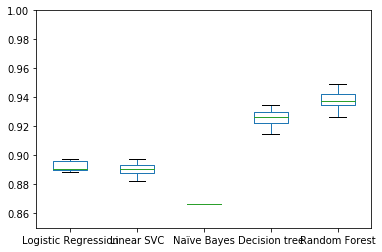

In [16]:
fit_eval(lda_vectors)

Use `components_` attribute of the LDA to find top 5 words of each topic and print them out.

In [ ]:
for i, topic in enumerate(lda.components_, start=1):
    # Your solution
    print('Top in '+str(i)+':', ...)

In a few sentences describe your observations with regard to comparing vanilla TF-IDF vs adding a LDA on top of a count vectorizer.

Hit `enter` to edit this cell